# A3b: Filtering  
Finn Hittson - fxh157  
CSDS 464  
Due: March 9th, 2023  

In [1]:
%load_ext autoreload
%autoreload 2
import A3b_fxh157 as a3b
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../464-A3a_fxh157_files/')
import A3a_fxh157 as a3a

sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

## 1 Filtering

### 1a. A moving average filter

Part (A):  
$y_M[n]$ has the form
$$
y_M[n]=\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]=\frac{1}{M}(x[n]+x[n-1]+\cdots+x[n-M+1]).
$$
$y_{M-1}[n-1]$ has the form
$$
y_{M-1}[n-1]=\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]=\frac{1}{M-1}(x[n-1]+x[n-2]+\cdots+x[n-M+1]).
$$
Distribute the $\frac{1}{M}$ in $y_M[n]$.
$$
y_M[n]=\frac{x[n]}{M}+\frac{x[n-1]}{M}+\cdots+\frac{x[n-M+1]}{M}
$$
Set $1-\lambda=\frac{1}{M}$. This makes $\lambda=\frac{M-1}{M}$. Reformat the expression.
$$
y_M[n]=(1-\lambda)x[n]+\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]=(1-\lambda)x[n]+y_M[n-1]
$$
Note that $\lambda y_{M-1}[n-1]=y_M[n-1]$ so making this substitution gives us the desired result.
$$
y_M[n]=\lambda y_{M-1}[n-1]+(1-\lambda)x[n]
$$

Part (B):  
Write the derived expression in the form of summations.
$$
\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]=\lambda\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]+(1-\lambda)x[n]
$$
Approximate $\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]\approx\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]$ since for large $M$ the difference will be negligible and simplify the expression.
$$
\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]\approx\lambda\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]+(1-\lambda)x[n]
$$
Let $y[n]=\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]$ to get our desired result.
$$
y[n]=\lambda y[n-1]+(1-\lambda)x[n]
$$

Part (C):  
When $\lambda$ is increased, this causes $y[n-1]$ to become closer in value to $y[n]$ and has the opposite effect when $\lambda$ is decreased. 

### 1b. Implementation

Example: Plot of a $100ms$ random process generated with a sigma of $1.0$ and the output of a moving average filter using a $\lambda=0.9$.

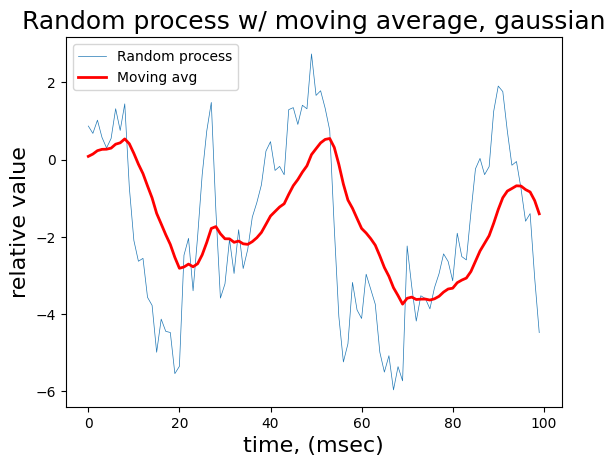

In [2]:
rand = a3b.randprocess(N=100, s=1.0, ntype='gaussian')
avg = a3b.movingavg(x=rand, l=0.9)
a3b.plot_movingavg(rand=rand, avg=avg, tunits="msec", title="Random process w/ moving average, gaussian")

Example: Plot of a $100ms$ random process generated with uniformly distributed noise between $(-1,1)$ and the output of a moving average filter using a $\lambda=0.4$.

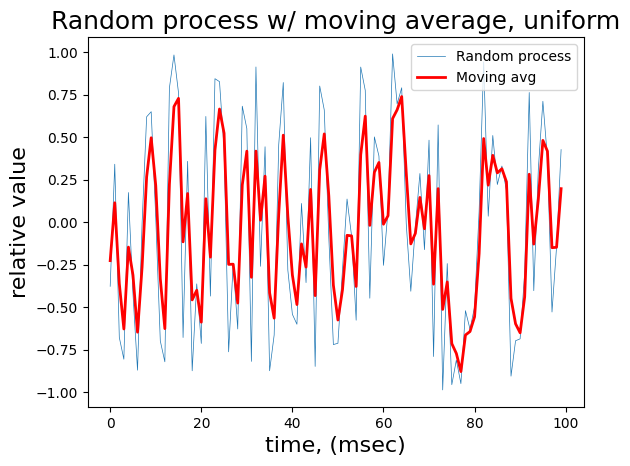

In [3]:
rand = a3b.randprocess(N=100, s=1.0, ntype='uniform')
avg = a3b.movingavg(x=rand, l=0.4)
a3b.plot_movingavg(rand=rand, avg=avg, tunits="msec", title="Random process w/ moving average, uniform")

As $\lambda$ decreases the moving average fits the input random signal better and better. If $\lambda=0$ then the moving average is exactly the input random signal. 

Example: Noisy $1Hz$ sinewave over $1$ second with a moving average that smooths the signal.

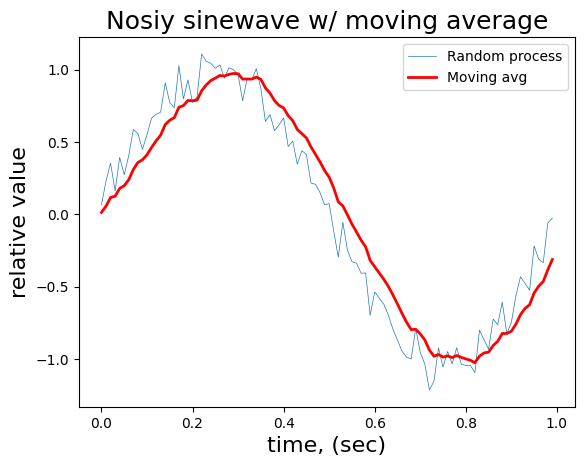

In [4]:
t, x, n = a3a.noisysignal(t0=0, tn=1, g=a1b.sinewave, fs=100, tau=0, T=1, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x+n, l=0.8)
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=0, title="Nosiy sinewave w/ moving average", tunits="sec")

### 1c. System delay

There is a system delay because the moving average is computed in frames and the frame average represents the signal value furthest to the right in that frame. Therefore for the moving average to reflect the signal's relative average point it needs the averaged elements to be centered on that specific location. This only occurs when the framing catches up and is centered on that relative point but this value is now the average of a later point in the signal. It can also be achieved by using the frames average to represent the middle point in the frame or shifting the entire moving average signal to the left when complete.

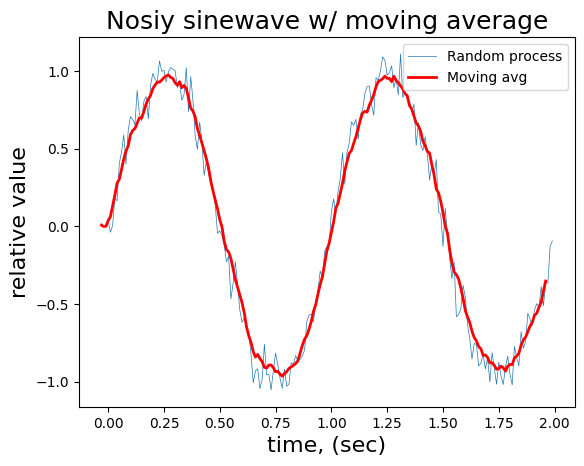

In [5]:
t, x, n = a3a.noisysignal(t0=0, tn=2, g=a1b.sinewave, fs=100, tau=0, T=2, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x+n, l=0.8)
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=-0.03, title="Nosiy sinewave w/ moving average", tunits="sec")

## 2. IRR Filters

### 2a. Implementation

Example: IIR filter that closely reproduces the moving average filter.

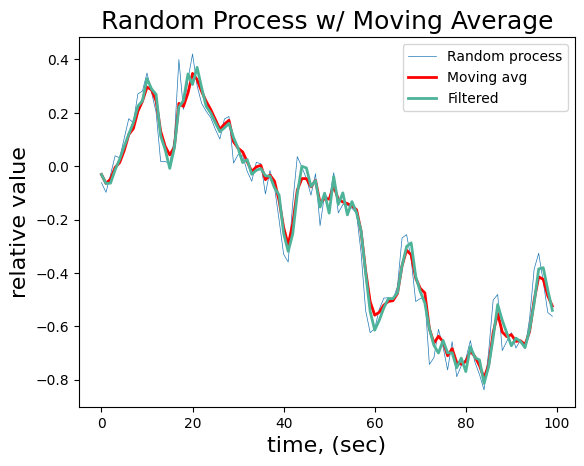

In [6]:
rand = a3b.randprocess(N=100, s=0.1)
avg = a3b.movingavg(x=rand, l=0.5)
a = [0.5]
b = [0.5, 0.5, 0.5]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)

### 2b. First order low- and high-pass IIR filters

#### Low-pass filter

Example: Plot of a random process passed through a first order low-pass filter with coefficients $a=[-0.9]$ and $b=[0.1]$ in Gaussian noise with $\sigma=1.0$.

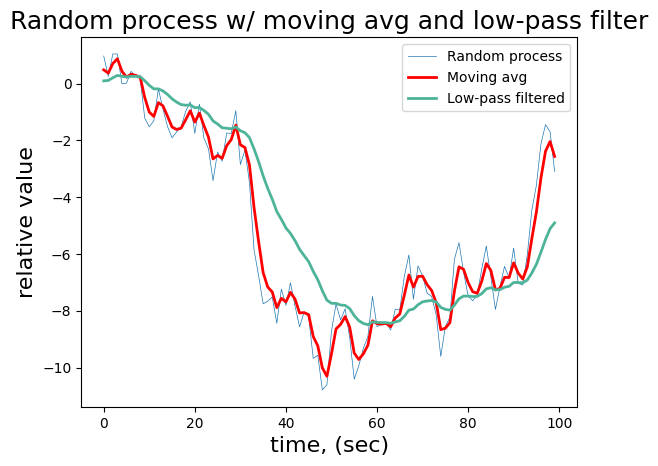

In [7]:
rand = a3b.randprocess(N=100, s=1, ntype="gaussian")
avg = a3b.movingavg(x=rand, l=0.5)
a = [-0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered, title="Random process w/ moving avg and low-pass filter", label="Low-pass filtered")

#### High-pass filter

Example: Plot of a random process passed through a first order high-pass filter with coefficients $a=[0.9]$ and $b=[0.1]$ in Gaussian noise with $\sigma=1.0$.

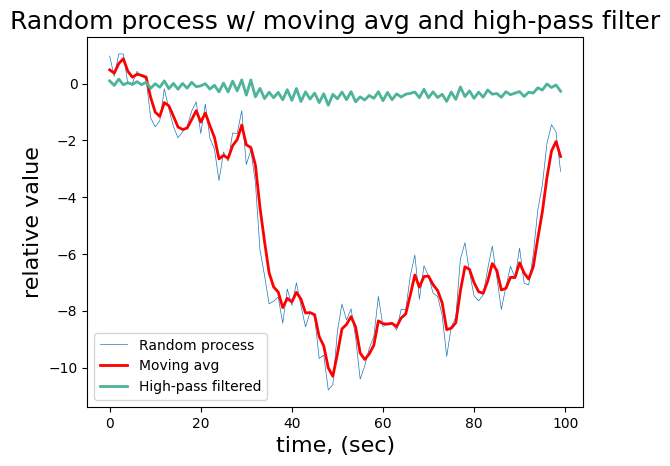

In [8]:
a = [0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered, title="Random process w/ moving avg and high-pass filter", label="High-pass filtered")

The low pass filter only selects low frequency components from the input signal to keep. Therefore the resulting signal is composed only of low frequencies so it will result in a smooth signal without any sharp points. The plot above demonstrates this since it is a smoothed version of the noisy input signal which has a mixture of high and low frequencies. Keeping the lower frequencies makes a smoother signal since the period is longer. The high pass filter only keeps the higher frequencies so the output is a strainter light that is jagged which represents the parts of the signal that have high frequencies. This does not fit the curve well since the lower frequenceis dictate the overall shape of the signal and the higher frequencies dictate the more intricate details of the signal.

### 2c. Second order bandpass filters

Example: Plot of a $100ms$ random process in uniformly distributed noise between $(-1,1)$ passed through a second order bandpass filter with coefficients $a = [-1.265, 0.81]$ and $b = [0.135]$.

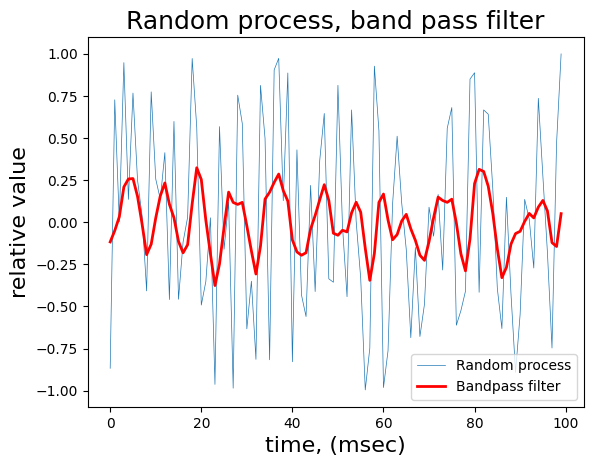

In [9]:
rand = a3b.randprocess(N=100, ntype="uniform")
avg = a3b.movingavg(x=rand, l=0.5)
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, filtered=filtered, title="Random process, band pass filter", tunits="msec", label="Bandpass filter")

Example: Plot of a $100ms$ random process in uniformly distributed noise between $(-1,1)$ passed through a second order bandpass filter with coefficients $a = [-1.702, 0.81]$ and $b = [0.063]$.

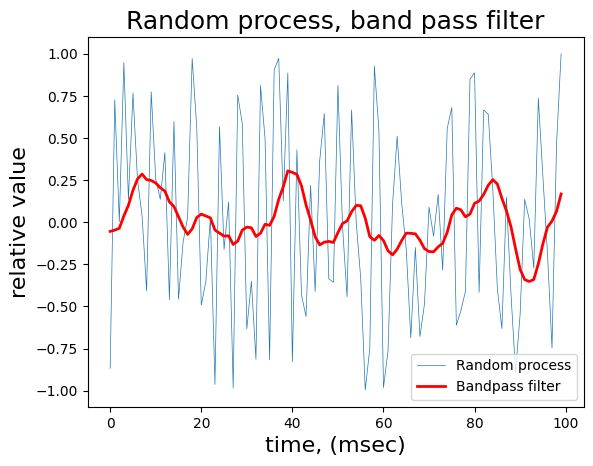

In [10]:
a = [-1.702, 0.81]
b = [0.063]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, filtered=filtered, title="Random process, band pass filter", tunits="msec", label="Bandpass filter")

The two IIR difference equations are 
$$
y[n]=0.135x[n]-\left(-1.265y[n-1]+0.81y[n-2]\right)
$$
and
$$
y[n]=0.063x[n]-\left(-1.702y[n-1]+0.81y[n-2]\right).
$$
The first equation produces a band pass filter that selects higher frequencies since the output waveform is more jagged and less smooth. The filter coefficients are therefore defining a region of higher frequencies to select from when filtering. The second equation produces a band pass filter that is smoother and more periodic. This filter is more symbolic of a moving average so the filter coefficients are therefore defining a region of lower frequencies to select from when filtering.

### 2d. Characterizing the filter response

Example: Plot of the filter response that shows the characteristic behavior of the second order bandpass filter with coefficients $a = [-1.265, 0.81]$ and $b = [0.135]$ over different frequencies and noise levels.

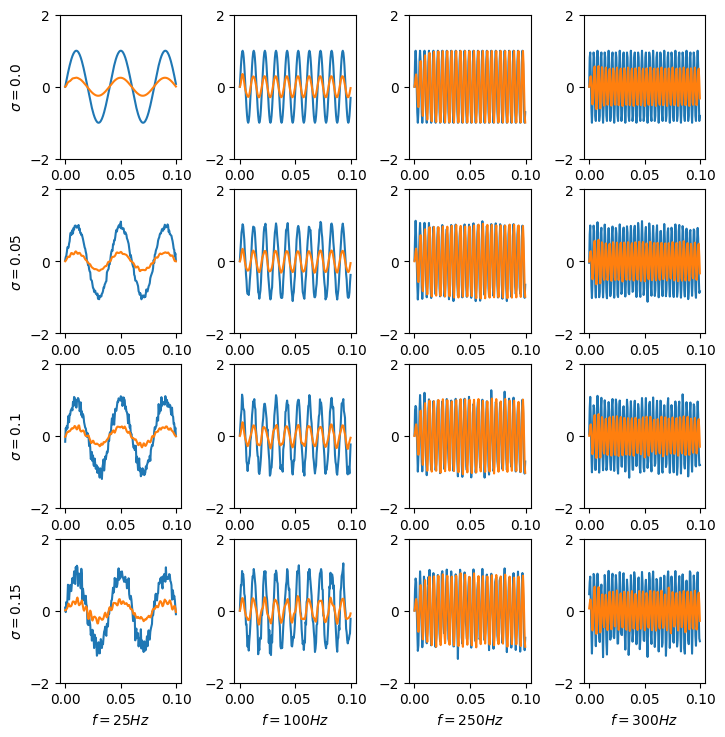

In [11]:
a = [-1.265, 0.81]
b = [0.135]
s = [0.0, 0.05, 0.1, 0.15]
f = [25, 100, 250, 300]

a3b.plot_filter_grid(g=a1b.sinewave, a=a, b=b, rows=4, cols=4, t0=0, tn=0.1, fs=2000, tau=0, T=0.1, tscale=1, s=s, f=f)

Example: Plot of the filter response that shows the characteristic behavior of the second order bandpass filter with coefficients $a = [-1.702, 0.81]$ and $b = [0.063]$ over different frequencies and noise levels.

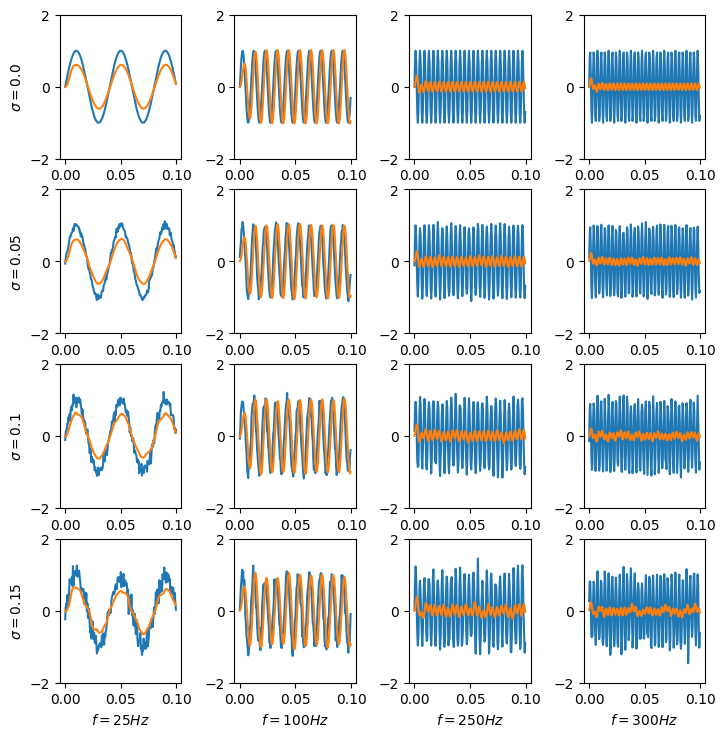

In [12]:
a = [-1.702, 0.81]
b = [0.063] 
s = [0.0, 0.05, 0.1, 0.15]
f = [25, 100, 250, 300]

a3b.plot_filter_grid(g=a1b.sinewave, a=a, b=b, rows=4, cols=4, t0=0, tn=0.1, fs=2000, tau=0, T=0.1, tscale=1, s=s, f=f)

The first set of bandpass filter coefficients are more effective at filtering the sinewaves with high frequencies. The filtered output at lower frequencies do not have the correct amplitude to accurately represent the lower frequency sinewaves. These coefficients are also less susceptible to noise at higher frequencies and are most effective at a $250Hz$ sinewave. The second set of bandpass filter coefficients are more effective at filtering sinewaves with lower frequencies. They are particularly effective at $100Hz$, perfectly matching the sinweave in all noise environments. These coefficients are less susceptible to noise at lower frequencies but at higher frequenceis, the filtered output is not consistent and more spontaneous in relation to the noise. These outputs are also too small in relation to the actual amplitude of the input waveform.

Example: Plot of the signals output power vs the input frequency for the bandpass filters ($a = [-1.265, 0.81]$, $b = [0.135]$ and $a = [-1.702, 0.81]$, $b = [0.063]$) with a sampling frequency of $2000 Hz$.

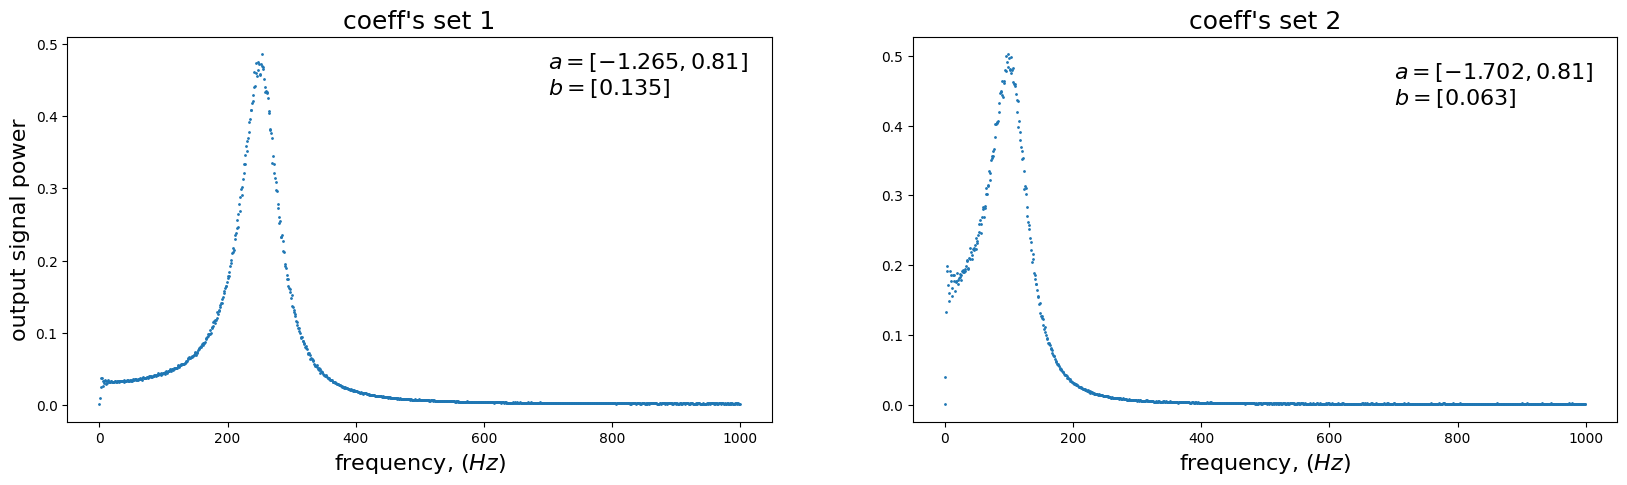

In [13]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
a = [-1.265, 0.81]
b = [0.135]
f0, p0 = a3b.freqpower(g=a1b.sinewave, a=a, b=b, t0=0, tn=0.1, fs=2000, tau=0, T=0.1, s=0.1, tscale=1)

axs[0].scatter(f0, p0, s=1)
axs[0].set_xlabel("frequency, ($Hz$)", fontsize=16)
axs[0].set_ylabel("output signal power", fontsize=16)
axs[0].set_title("coeff's set 1", fontsize=18)
axs[0].text(700, 0.43, "$a = [-1.265, 0.81]$\n$b = [0.135]$", fontsize=16)

a = [-1.702, 0.81]
b = [0.063] 
f1, p1 = a3b.freqpower(g=a1b.sinewave, a=a, b=b, t0=0, tn=0.1, fs=2000, tau=0, T=0.1, s=0.1, tscale=1)

axs[1].scatter(f1, p1, s=1)
axs[1].set_xlabel("frequency, ($Hz$)", fontsize=16)
axs[1].set_title("coeff's set 2", fontsize=18)
axs[1].text(700, 0.43, "$a = [-1.702, 0.81]$\n$b = [0.063]$", fontsize=16)

plt.show()

These plots indicate that the system best matches/filters the sinewave at a specific frequency. For the first set of coefficients it best filters the signal at $250Hz$ and the second set best filteres the signal at $100Hz$.

## 3. The impulse response function

### 3a. Deriving the impulse response function

$$
x[n]=\sum_{k=-\infty}^\infty x[k]\delta[n-k]
$$
$$
\mathcal{H}\left(x[n]\right)=\mathcal{H}\left(\sum_{k=-\infty}^\infty x[k]\delta[n-k]\right)
$$
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty \mathcal{H}\left(x[k]\delta[n-k]\right)
$$
Need linearity to factor out constant $x[k]$ from $\mathcal{H}\left(x[k]\delta[n-k]\right)$.
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty x[k]\mathcal{H}\left(\delta[n-k]\right)
$$
Need time invariance since the delta function operates with and without a time delay. Therefore $\mathcal{H}\left(\delta[n-k]\right)=h[n-k]$.
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty x[k]h[n-k]
$$
$$
h[n]=\mathcal{H}(\delta(n))
$$
$$
\delta(n)=\begin{cases}
1 & n=0\\
0 & n\ne 0 
\end{cases}
$$
$$
h[n]=\mathcal{H}(\delta(n))=\begin{cases}
\mathcal{H}(1) & n=0\\
\mathcal{H}(0) & n\ne 0 
\end{cases}
$$
We can predict the system response for an arbitrary input since the response at any time is equivalent to the input signal times the dirac delta function centered at that time as well. 

### 3b. Impulse responses

The impulse response function can be interpreted as a weighted averaged since it can be represented in the following form:
$$
y[n]=x_0\delta[n-0]+x_1\delta[n-1]+\cdots+x_k\delta[n-k]
$$
From this the weights are the value of the signal so its a linear combination of mostly zeros.

Example: Plot of the impulse response function of a $100ms$ random process in Gaussian noise with $\sigma=1.0$.

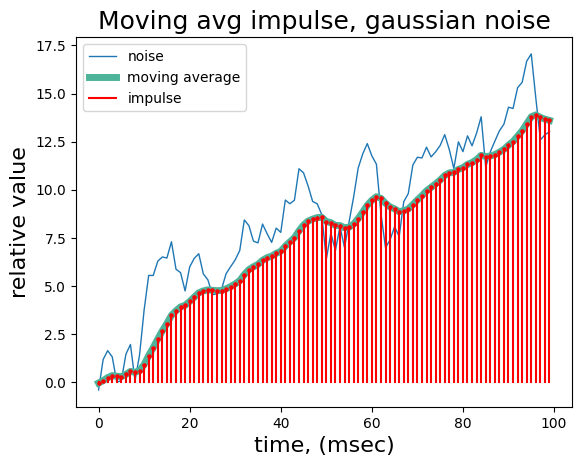

In [14]:
rand = a3b.randprocess(N=100, s=1.0, ntype='gaussian')
avg = a3b.movingavg(x=rand, l=0.9)
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=avg, rand=rand, title="Moving avg impulse, gaussian noise", tunits="msec", label="moving average")

Example: Plot of the impulse response function of a $100ms$ random process in unifomly distributed noise in $(-1,1)$

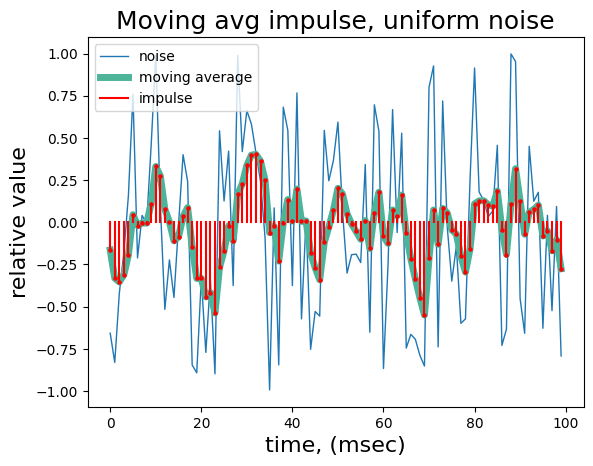

In [15]:
rand = a3b.randprocess(N=100, s=1.0, ntype='uniform')
avg = a3b.movingavg(x=rand, l=0.75)
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=avg, rand=rand, title="Moving avg impulse, uniform noise", tunits="msec", label="moving average")

Example: Plot of a the impulse response function of the shifted moving average of a $1sec$ noisy sinewave with frequency $1Hz$.

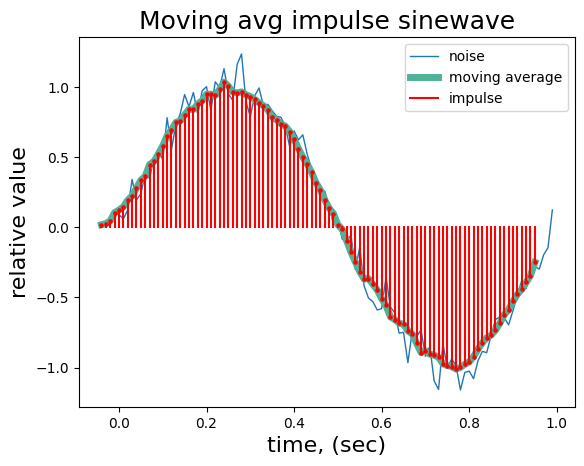

In [16]:
t0, x0, n0 = a3a.noisysignal(t0=0, tn=1, g=a1b.sinewave, fs=100, tau=0, T=1, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x0+n0, l=0.8)
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t/100, y=y, t0=t0, x0=avg, rand=x0+n0, shift=-0.04, title="Moving avg impulse sinewave", label="moving average")

Example: Plot of the impulse response function of the IIR filter replecating the moving average of a $100ms$ random process in Gaussian noise with $\sigma=0.1$.

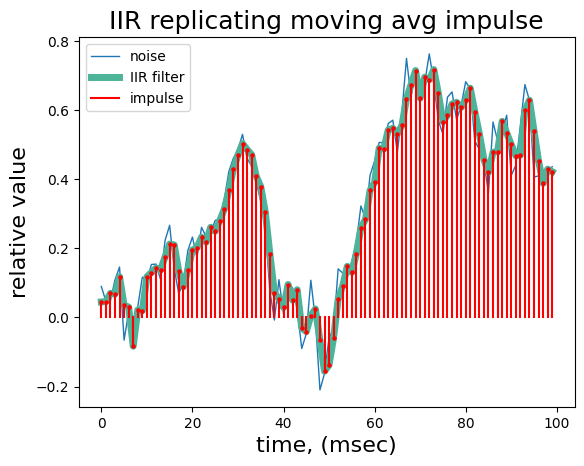

In [17]:
rand = a3b.randprocess(N=100, s=0.1)
a = [0.5]
b = [0.5, 0.5, 0.5]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
#a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="IIR replicating moving avg impulse", tunits="msec", label="IIR filter")

Example: Plot of the impulse response of the first order low-pass filter of a $100ms$ random process in Gaussian noise with $\sigma=0.1$.

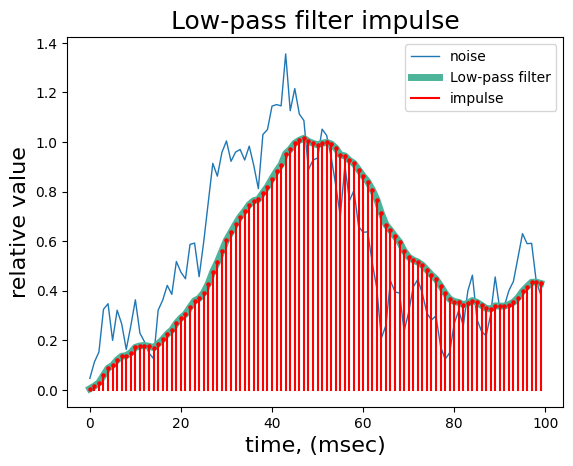

In [18]:
rand = a3b.randprocess(N=100, s=0.1, ntype="gaussian")
a = [-0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="Low-pass filter impulse", tunits="msec", label="Low-pass filter")

Example: Plot of the impulse response of the first order high-pass filter of a $100ms$ random process in Gaussian noise with $\sigma=0.1$.

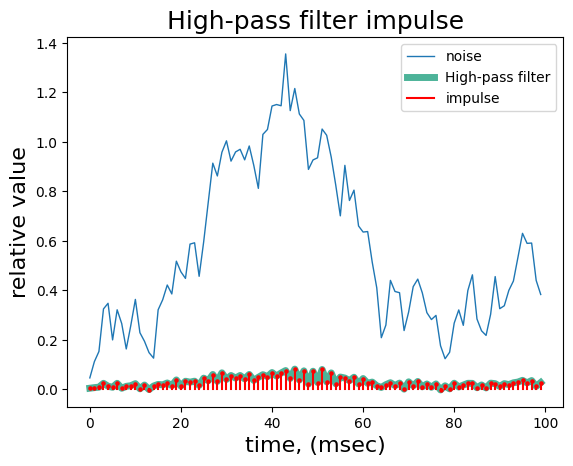

In [19]:
a = [0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="High-pass filter impulse", tunits="msec", label="High-pass filter")

Example: Plot of the impulse response function of a second order bandpass filter with coefficients $a = [-1.265, 0.81]$ and $b = [0.135]$ applied on a $100ms$ random process in uniformly distributed noise in $(-1,1)$.

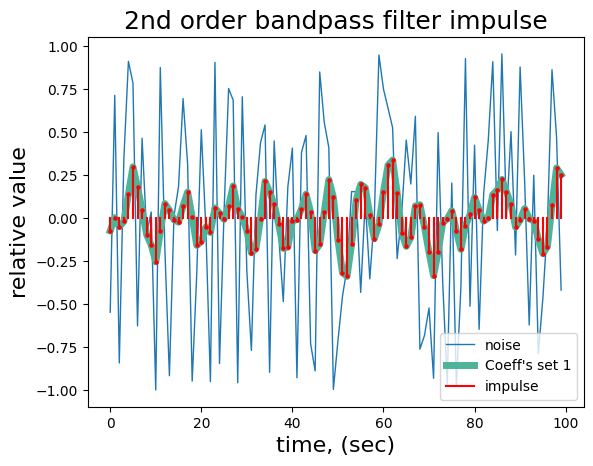

In [20]:
rand = a3b.randprocess(N=100, s=0.1, ntype="uniform")
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="2nd order bandpass filter impulse", label="Coeff's set 1")

Example: Plot of the impulse response function of a second order bandpass filter with coefficients $a = [-1.702, 0.81]$ and $b = [0.063]$ applied on a $100ms$ random process in uniformly distributed noise in $(-1,1)$.

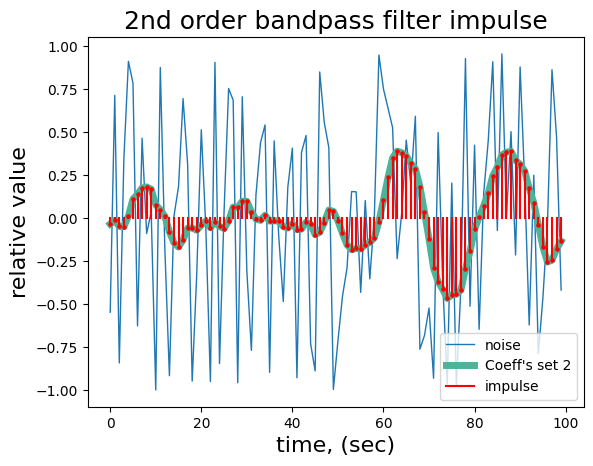

In [21]:
a = [-1.702, 0.81]
b = [0.063] 
filtered = a3b.filterIIR(x=rand, a=a, b=b)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="2nd order bandpass filter impulse", label="Coeff's set 2")

## 4. Filtering with convolution

### 4a. Implementing convolution 

Example: Convolution of IIR filter that replicates of moving average of a $100ms$ random process in Gaussian noise with $\sigma=0.1$. 

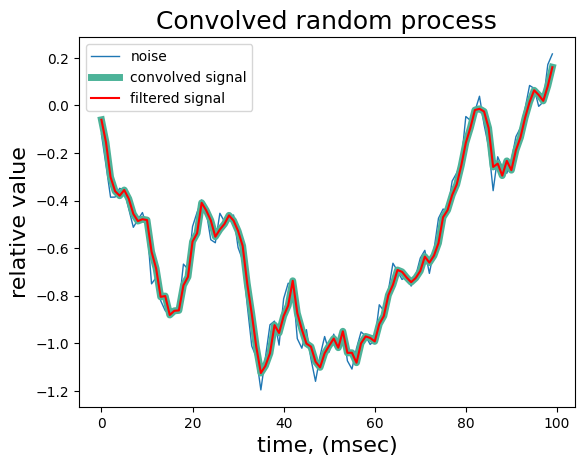

In [93]:
rand = a3b.randprocess(N=100, s=0.1)
a = [0.5]
b = [0.5, 0.5, 0.5]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
y = a3b.convolve(x=filtered, h=[1], h0=0)
a3b.plot_convolution(t=list(range(100)), y=filtered, x0=y, t0=list(range(100)), rand=rand, title="Convolved random process", tunits="msec", label1="convolved signal", label2="filtered signal")

### 4b. FIR filtering

Example: Plot of the convolution kernel of a $250Hz$ Gabor function with width (sigma) equal to $3/250$.

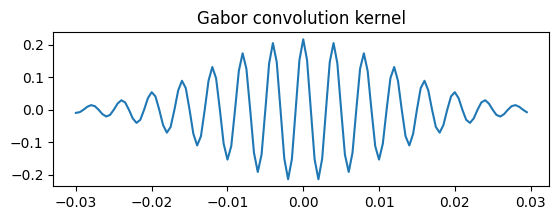

In [98]:
t = np.arange(-0.03, 0.03, 1/2000)
gabor = a1b.gabore(t=t, f=250, sigma=3/250)/a1b.gabore_norm(y=gabor, f=250, sigma=3/250)
kernel = a3b.filterIIR(x=gabor, a=[-1.265, 0.81], b=[0.135])
plt.figure().set_figheight(2)
plt.plot(t, gabor)
plt.title("Gabor convolution kernel")
plt.show()

Example: Plot of the output of convolving the Gabor kernel above on uniform random noise.

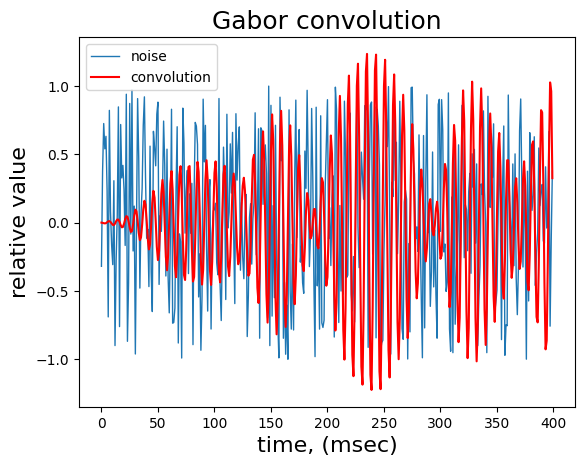

In [99]:
N = 400
rand = np.random.uniform(-1, 1, size=N)
y = a3b.convolve(x=rand, h=kernel, h0=1)
a3b.plot_convolution(t=list(range(0,N)), y=y, t0=list(range(0,N)), rand=rand, title="Gabor convolution", tunits="msec")

Example: 3 plots of $100 ms$ of uniformly distributed noise on $(-1,1)$ passed through a second order bandpass filter with coefficients $a = [-1.265, 0.81]$ and $b = [0.135]$, then an FIR filter approximation and then the difference between the two filters.

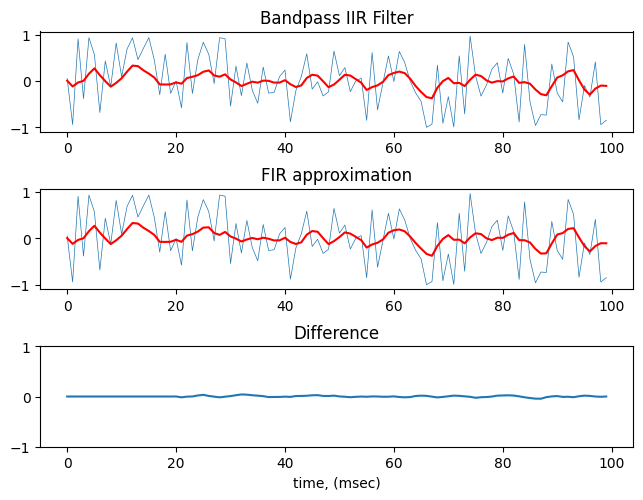

In [80]:
x = a3b.randprocess(N=100, ntype="uniform")
filtered = a3b.filterIIR(x=x, a=[-1.265, 0.81], b=[0.135])
t, y = a3b.impulse(filtered, step=1)

fig, axs = plt.subplots(3,1,figsize=(7,5))
fig.tight_layout(pad=2.0)

axs[0].plot(x, '#1f77b4', linewidth=0.5)
axs[0].plot(filtered, 'r')
axs[0].set_title("Bandpass IIR Filter")

kernel = a3b.filterIIR(x=[1]+[0]*19, a=[-1.265, 0.81], b=[0.135])
y = a3b.convolve(x=x, h=kernel, h0=0)
axs[1].plot(x, '#1f77b4', linewidth=0.5)
axs[1].plot(y, 'r')
axs[1].set_title("FIR approximation")

axs[2].plot(np.array(y) - np.array(filtered), '#1f77b4')
axs[2].set_title("Difference")
axs[2].set_xlabel("time, (msec)")
axs[2].set_ylim([-1,1])

plt.show()

### 4c. Using matched filters to detect signals in noise

Example: Plot of a delayed gammatone mixed with noise and then filtered using convolution.

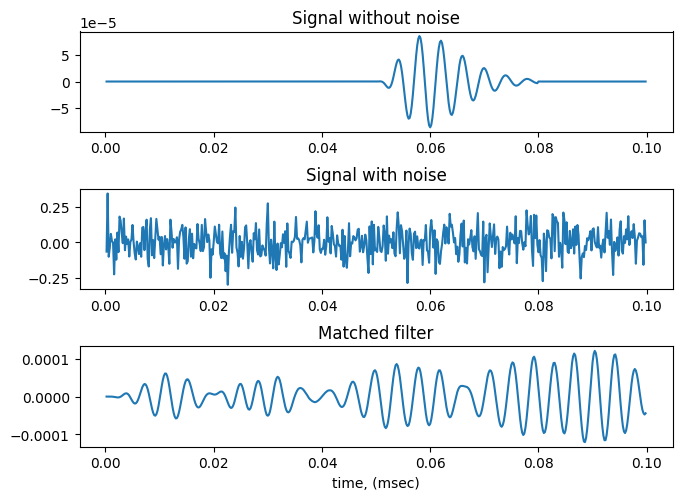

In [92]:
tau = 0.05
fs = 5000
T = 0.03
t0, x0, n0 = a3a.noisysignal(t0=0, tn=0.1, g=a1b.gammatone, fs=fs, tau=tau, T=T, s=0.1, ntype="gaussian", tscale=1, f=250)
kernel = x0[int(fs*tau):int(fs*(tau+T))]

fig, axs = plt.subplots(3,1,figsize=(7,5))
fig.tight_layout(pad=2.0)
axs[0].plot(t0, x0, '#1f77b4')
axs[0].set_title("Signal without noise")

axs[1].plot(t0, x0+n0, '#1f77b4')
axs[1].set_title("Signal with noise")

y = a3b.convolve(x=x0+n0, h=kernel, h0=1)
axs[2].plot(t0, y, '#1f77b4')
axs[2].set_xlabel("time, (msec)")
axs[2].set_title("Matched filter")
plt.show()